# Data Generator

We have a common git repo now to create data e.g. rings.

In this notebook I would like to see how it works.

In [1]:
import scclevr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
 rings = scclevr.RingsBinaryUniform(2, ring_photon_rate=20)

In [3]:
 event_images, object_images, n_objects, object_features =  rings.gen_events(2_000)

Event images is the whole RICH picture.

(2000, 31, 31, 1)


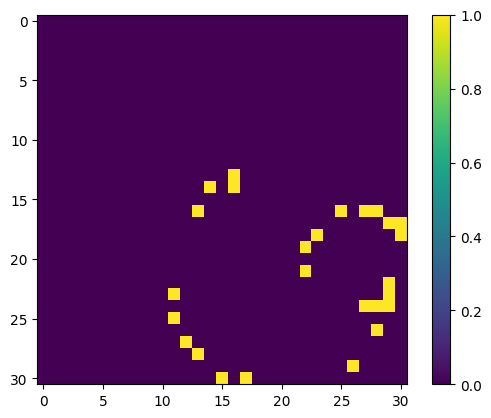

In [4]:
i=0
plt.imshow(event_images[i])
plt.colorbar()
print(event_images.shape)
#print(event_images[i])

Object_images are the separated rings

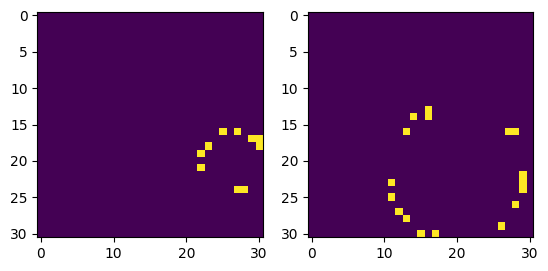

In [5]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(object_images[i][0])
fig.add_subplot(1,2,2)
plt.imshow(object_images[i][1])

n_objects tell us how many rings are in the picture.

In [6]:
n_objects.shape

(2000,)

In [7]:
n_objects

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

object_features tells the $x, y, R$ position of the rings.

In [8]:
object_features.shape

(2000, 2, 3)

## Look at more data

To get a feeling...

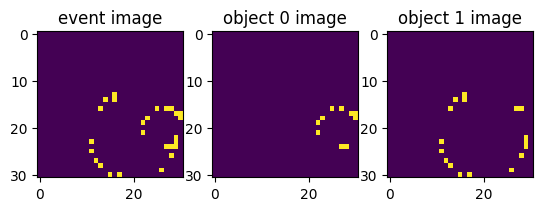

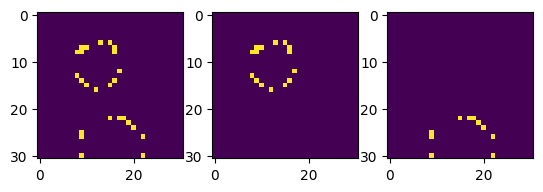

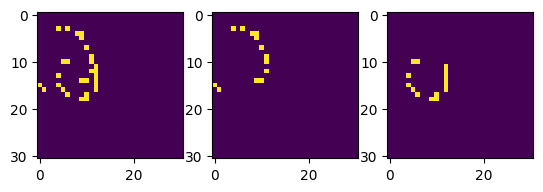

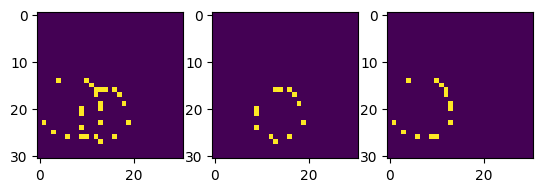

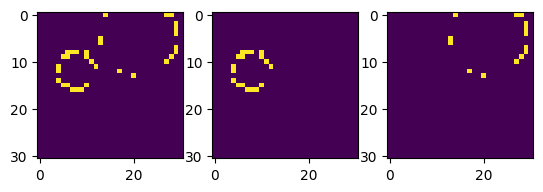

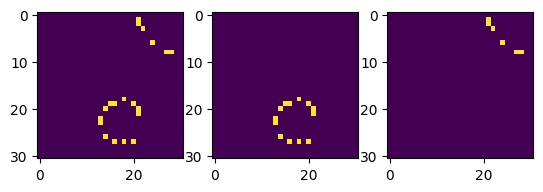

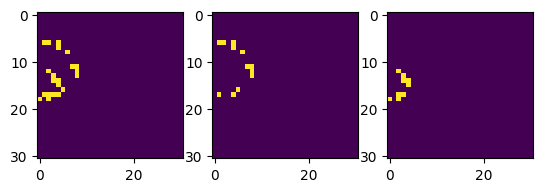

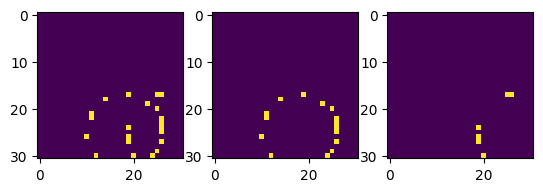

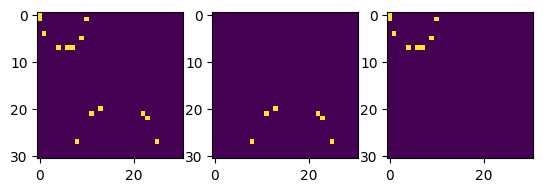

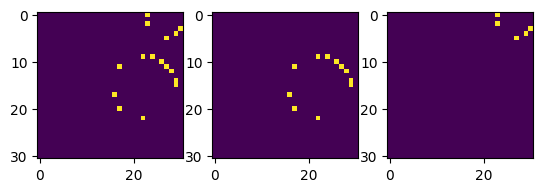

In [9]:
plot_n_events = min(event_images.shape[0], 10)
for i in range(plot_n_events):
    fig, axes = plt.subplots(1, n_objects[i]+1, )
    axes[0].imshow(event_images[i])
    if i == 0:
        axes[0].set_title('event image')
    for j in range(n_objects[i]):
        if i == 0:
            axes[j+1].set_title(f'object {j} image')
        axes[j+1].imshow(object_images[i][j])

# How to change the data to fit ISA

We need to 
- reshape arrays
- convert np arrays into pytorch tensors
- create masks instead of images of individual objects -> values between 0 and 1 between shared pixels

I start with maskes: 

In [11]:
object_images.shape

(2000, 2, 31, 31, 1)

In [18]:
i=0
e = event_images[i]
o1 = object_images[i][0]
o2 = object_images[i][1]

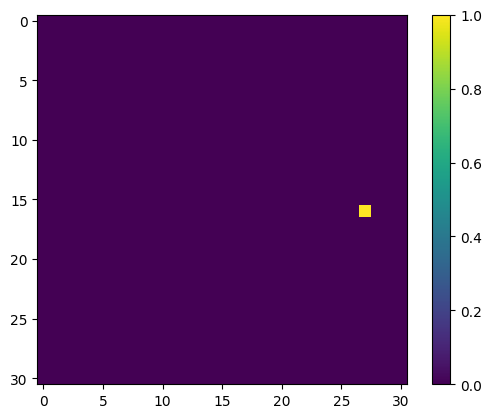

In [19]:
plt.imshow(o1+o2-e)
plt.colorbar()

In [20]:
double_pix = object_images[:, 0] + object_images[:, 1] - event_images

In [21]:
double_pix.shape

(2000, 31, 31, 1)

In [33]:
i_double_pix = np.where(double_pix!=0)

In [43]:
i_double_pix

(array([   0,   30,   32,   36,   42,   49,   54,   75,   91,   94,   94,
          98,  114,  116,  126,  130,  131,  142,  149,  156,  161,  165,
         166,  171,  171,  182,  184,  187,  197,  199,  204,  204,  205,
         216,  216,  232,  238,  244,  248,  258,  260,  260,  280,  285,
         295,  303,  311,  314,  314,  319,  319,  323,  329,  331,  337,
         346,  346,  346,  353,  358,  373,  376,  377,  377,  382,  387,
         393,  393,  395,  395,  405,  409,  420,  420,  430,  440,  444,
         460,  460,  461,  461,  462,  463,  476,  483,  491,  491,  491,
         494,  495,  495,  509,  513,  514,  516,  523,  523,  529,  560,
         566,  571,  573,  573,  582,  585,  589,  601,  601,  616,  624,
         627,  631,  634,  635,  635,  638,  638,  638,  643,  643,  653,
         658,  676,  678,  682,  690,  701,  714,  714,  720,  720,  733,
         740,  747,  747,  748,  754,  754,  754,  754,  760,  764,  771,
         777,  777,  793,  801,  802, 

In [34]:
val_double_pix = double_pix[i_double_pix]

In [35]:
val_double_pix # only ones as two rings can max overlap once 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [36]:
val_double_pix_replace = 1/(val_double_pix+1)

In [54]:
object_images[i_double_pix[0], 0, i_double_pix[1], i_double_pix[2]] = np.expand_dims(val_double_pix_replace, axis=(1))
object_images[i_double_pix[0], 1, i_double_pix[1], i_double_pix[2]] = np.expand_dims(val_double_pix_replace, axis=(1))

In [65]:
np.expand_dims(val_double_pix_replace, axis=(1))

(350, 1)

In [55]:
e = event_images[i]
o1 = object_images[i][0]
o2 = object_images[i][1]

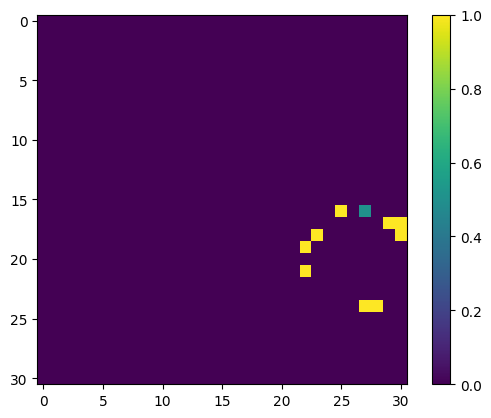

In [56]:
plt.imshow(o1)
plt.colorbar()

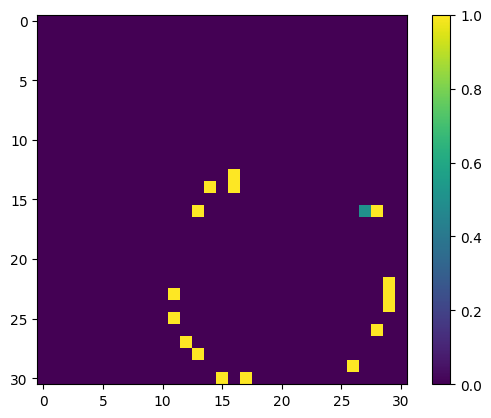

In [57]:
plt.imshow(o2)
plt.colorbar()

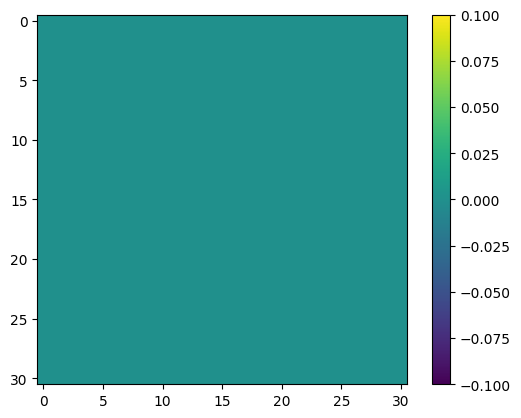

In [59]:
plt.imshow(o2+o1-e)
plt.colorbar()

In [66]:
def att_masks(event_images, object_images, n_objects):
    '''
    n_obejcts: int
    --------------
    returns attention masks, fraction of hits per pixel over slots
    '''
    multi_hits = np.sum(object_images, axis=1) - event_images
    i_multi_hits = np.where(multi_hits!=0)
    val_multi_hits = multi_hits[i_multi_hits]
    val_multi_hits_replace = 1/(val_multi_hits+1)
    for i in range(n_objects):
        object_images[i_multi_hits[0], 0, i_multi_hits[1], i_multi_hits[2]] = np.expand_dims(val_multi_hits_replace, axis=(1))
        object_images[i_multi_hits[0], 1, i_multi_hits[1], i_multi_hits[2]] = np.expand_dims(val_multi_hits_replace, axis=(1))
    
    return object_images

In [62]:
np.any(object_images[:, 0] + object_images[:, 1] != np.sum(object_images, axis=1))

False

In [63]:
np.sum(object_images, axis=1).shape

(2000, 31, 31, 1)

Lets continue with correct size:

In [69]:
print(object_images.shape)
print(event_images.shape)
print(object_features.shape)

(2000, 2, 31, 31, 1)
(2000, 31, 31, 1)
(2000, 2, 3)


In [ ]:
#X: torch.Size([100, 1, 32, 32])
#y: torch.Size([100, 2, 3]) yes!
# mask: torch.Size([100, 2, 32, 32])

In [71]:
new_arr = event_images.reshape(2000, 1, 31, 31)
new_arr.shape

(2000, 1, 31, 31)

In [74]:
np.squeeze(object_images, axis=4).shape

(2000, 2, 31, 31)

In [75]:
np.expand_dims(np.squeeze(event_images, axis=3), axis=1).shape

(2000, 1, 31, 31)

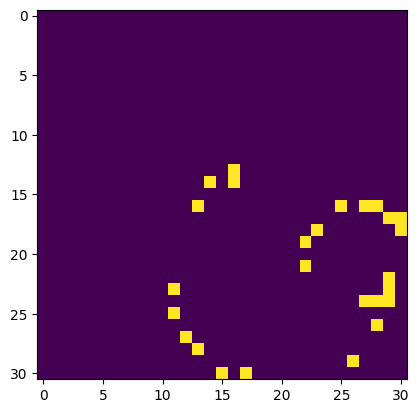

In [73]:
plt.imshow(new_arr[0, 0])

In [ ]:
def correct_dim(event_images, object_images):
    '''
    input shape:
    event_images.shape = (N, 31, 31, 1)
    object_images.shape = (N, 2, 31, 31, 1)
    '''
    object_images = np.squeeze(object_images, axis=4) # (N, 2, 31, 31)
    event_images = np.expand_dims(np.squeeze(event_images, axis=3), axis=1) # (N, 1, 31, 31)
    return object_images, event_images
    

In [76]:
def convert_into_pytorch_tensors(event_images, object_images, n_objects, object_features, device='cpu'):
    # out of data.py
    return torch.FloatTensor(event_images).to(device), \
               torch.FloatTensor(object_images).to(device), \
               torch.FloatTensor(n_objects).to(device), \
               torch.FloatTensor(object_features).to(device)
